## Digital-analog variational quantum eigensolver(DAVQE)


In [1]:
!pip install qiskit
!pip install pylatexenc
!pip install qiskit_nature
!pip install qutip
!pip install pyscf

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 6.7 MB 5.3 MB/s 
     |████████████████████████████████| 18.0 MB 370 kB/s 
     |████████████████████████████████| 240 kB 53.4 MB/s 
     |████████████████████████████████| 54 kB 2.8 MB/s 
     |████████████████████████████████| 112 kB 46.9 MB/s 
     |████████████████████████████████| 1.6 MB 42.9 MB/s 
     |████████████████████████████████| 49 kB 5.8 MB/s 
     |████████████████████████████████| 49 kB 1.7 MB/s 
     |████████████████████████████████| 943 kB 57.6 MB/s 
     |████████████████████████████████| 37.5 MB 1.3 MB/s 
     |████████████████████████████████| 4.1 MB 32.2 MB/s 
     |████████████████████████████████| 112 kB 59.4 MB/s 
  Created wheel for qiskit: filename=qiskit-0.37.1-py3-none-any.whl size=12067 sha256=01bbbfac84a32e8988bfeb64f1265f8652cd16d4536cf49eef0b50d088e1920b
  Stored in directory: /root/.cache/pip/wheels/1c/3c/a3/bf8c2

In [2]:
!pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Digital-analog Variational Quantum Eigensolver

In chemistry, it's assumed that properties of atoms and molecules can be determined by solving the Schrödinger equation. VQE comes from outsourcing some of the problem's processing workload to a classic computer. To start with, first prepare the ansatz, parameterized blocks within a quantum circuit, then, through iterative loops find the optimal parameters for this circuit using a classical optimizer. There are two fundamental ways to implement quantum: analog quantum simulation and digital quantum computing. A digital quantum computer is built on top of physical platform processors, building quantum circuits and quantum gate-based models, such as superconducting circuits to implement any routine or algorithm. Analog quantum simulation, imitates a controllable quantum system whose dynamics are proven in previous results; those tend to grow exponentially when the dimension of many-body complexity increases. The defining advantage of VQE over classical algorithms comes from the verification that a quantum processing unit can efficiently represent and store the wave function of the problem. Nowadays there exist another paradigm, called digital-analog quantum simulations (DAQS), which apply both digital and analog blocks in arrangement to operate their complexity and versatility. For DAQC, this combine flexibility of digital quantum computation with the robustness of analog quantum simulators. This notebook is aimed to solve the ground state energy of the hydrogen molecule by using Digital-analog variational quantum eigensolver(DA-VQE). 

In conventional VQE, entanglement of qubits is performed by the digital control gates such as CX gates. DA-VQE, on the other hand, employs a time-evolution operator $U(t) = e^{iH't}$. $H'$ usually consists of the two-spin interactions, which is distinct from the target Hamiltonian $H$ for optimization.

In [3]:
from DA_VQE import *



First, we define the two-qubit hamiltonian $H$. We load the molecules from qiskit.

In [4]:
# Loading the lithium hydride molecule
LiH_op, LiH_problem, LiH_converter = load_Molecule("LiH")
print(f'Number of qubits: {LiH_op.num_qubits}')
ref_value = energy_solver(LiH_op)
print(f'Bonding energy value: {ref_value:.5f}')
ref_value = total_energy_solver(LiH_problem, LiH_converter)
print(f'Total energy: {ref_value:.5f}')

The atomic distance is  1.545 Å


/usr/local/lib/python3.7/dist-packages/qiskit_nature/problems/second_quantization/electronic/electronic_structure_problem.py:93: ListAuxOpsDeprecationWarning: List-based `aux_operators` are deprecated as of version 0.3.0 and support for them will be removed no sooner than 3 months after the release. Instead, use dict-based `aux_operators`. You can switch to the dict-based interface immediately, by setting `qiskit_nature.settings.dict_aux_operators` to `True`.
  second_quantized_ops = self._grouped_property_transformed.second_q_ops()


Number of qubits: 4
Bonding energy value: -8.89100
Total energy: -7.86347


In [5]:
# Loading the dihydrogen molecule
H2_op, H2_problem, H2_converter = load_Molecule("H2")
print(f'Number of qubits: {H2_op.num_qubits}')
ref_value = energy_solver(H2_op)
print(f'Bonding energy value: {ref_value:.5f}')
ref_value = total_energy_solver(H2_problem, H2_converter)
print(f'Total energy(core repulsion included): {ref_value:.5f}')

The atomic distance is  0.735 Å
Number of qubits: 2
Bonding energy value: -1.85728
Total energy(core repulsion included): -1.13731


In [6]:
# Loading the beryllium hydride molecule
BeH2_op, BeH2_problem, BeH2_converter = load_Molecule("BeH2")
print(f'Number of qubits: {BeH2_op.num_qubits}')
ref_value = energy_solver(BeH2_op)
print(f'Bonding energy value: {ref_value:.5f}')
ref_value = total_energy_solver(BeH2_problem, BeH2_converter)
print(f'Total energy: {ref_value:.5f}')

The atomic distance is  1.3 Å
Number of qubits: 6
Bonding energy value: -19.02446
Total energy: -15.56445


As the above problem since we are working with low dimensionality is still tractable classically with NumPyMinimumEigensolver - searching over feasible states and returns an eigenstate that has the smallest eigenvalue among feasible states, therefore with this methods is possible to compute a reference value so we can compare later the results. 

## Performance *without* noise

The next cell follow the hackaton example to make the backend and QuantumInstance, holding the backend as well as various other run time configuration. Since the job is running on simulator (mimic the execution of an actual device without adding noise) we can see output measurement without attempt to mitigate noise.

In [8]:
# Initialize a pseudo-random number sequence
seed = 175
iterations = 125
algorithm_globals.random_seed = seed
# Construct the backend from an aer simulator and the quantum instance
backend = Aer.get_backend('aer_simulator')
qi = QuantumInstance(backend=backend, seed_simulator=seed, seed_transpiler=seed,shots=8192) 
#num_qubits = 2
#num_qubits = 4

## Time-evolution operator $U(t)$
Note that this time-evolving Hamiltonian is not the Hamiltonian we want to optimize. (non-commutative with the target Hamiltonian for optimizing)<- This might be wrong!


Given a Hermitian operator $\hat H$ with an unknown minimum eigenvalue $E_{min}$, associated with the eigenstate $|\psi_{min}\rangle$, VQE provides an estimate $E_{\theta}$, bounded by $E_{min}$:

\begin{align*}
    E_{min} \le E_{\theta} \equiv \langle \psi(\theta) |\hat H|\psi(\theta) \rangle
\end{align*}  

where $|\psi(\theta)\rangle$ is the trial state associated with $E_{\theta}$. Then, the time evolving operator $U(t) = e^{iH't}$ acting on the ground state part only gets the phase. We want, on the other hand, the hopping between the energy states so the coefficients <GS|$\psi(\theta)\rangle$> becomes maximum.

## Definitions of the analogue blocks that consists of XX, YY, and ZZ interactions

In [9]:
# Importing the necessary libraries
from qiskit.circuit import Gate, QuantumCircuit, QuantumRegister, ParameterExpression
from qiskit.quantum_info.operators.predicates import matrix_equal
from qiskit.quantum_info.operators.predicates import is_hermitian_matrix
from qiskit.extensions.exceptions import ExtensionError
from qiskit.circuit.exceptions import CircuitError
from numbers import Number
import numpy

from qiskit.circuit import Parameter, QuantumCircuit, QuantumRegister, ParameterVector
from qiskit.extensions.unitary import UnitaryGate


# This code is based on https://github.com/Qiskit/qiskit-terra/blob/main/qiskit/extensions/hamiltonian_gate.py licenced under Apache licence.
class CustomHamiltonianGate(Gate):
    def __init__(self, time, num_qubits, connectivity, h_coeffs, label=None):
        if isinstance(time, Number) and time != numpy.real(time):
            raise ExtensionError("Evolution time is not real.")
       
        self.num_qubits = num_qubits
        self.connectivity = connectivity
        self.h_coeff1 = h_coeffs[0]
        self.h_coeff2 = h_coeffs[1]
        self.h_coeff3 = h_coeffs[2]
        # Store instruction params
        super().__init__("custom_hamiltonian", num_qubits, [time, num_qubits, connectivity, h_coeffs[0], h_coeffs[1], h_coeffs[2]], label=label)
        # note that params[0] is time, params[1] is num_qubits, params[2] is connectivity
        # params[3] is h_coeff1, params[4] is h_coeff2, params[5] is h_coeff3

    def __array__(self, dtype=None):
        """Return matrix for the unitary."""
        # pylint: disable=unused-argument
        import scipy.linalg

        try:
            return scipy.linalg.expm(-1j * self.get_ham() * float(self.params[0]))
        except TypeError as ex:
            raise TypeError(
                "Unable to generate Unitary matrix for "
                "unbound t parameter {}".format(self.params[1])
            ) from ex

    def _define(self):
        """Calculate a subcircuit that implements this unitary."""
        q = QuantumRegister(self.num_qubits, "q")
        qc = QuantumCircuit(q, name=self.name)
        qc._append(UnitaryGate(self.to_matrix()), q[:], [])
        self.definition = qc

    def validate_parameter(self, parameter):
        return parameter

    def get_ham(self):
        dim = 2 ** self.num_qubits
        num_connections = len(self.connectivity)
        zz_hamiltonian = np.zeros([dim, dim], dtype=np.complex128)
        xx_hamiltonian = np.zeros([dim, dim], dtype=np.complex128)   # modification to add sigma_x interactions
        yy_hamiltonian = np.zeros([dim, dim], dtype=np.complex128)   # modification to add sigma_y interactions

        for c in range(num_connections):
            ops_to_tensor = [qt.identity(2)] * self.num_qubits
            ops_to_tensor[self.connectivity[c][0]] = qt.sigmaz()
            ops_to_tensor[self.connectivity[c][1]] = qt.sigmaz()
            zz_hamiltonian += float(self.params[3]) * np.array(qt.tensor(ops_to_tensor)) #+= 
        # repeat for xx and yy interaction hamiltonian. Note that we will change the params[] index    
        for c in range(num_connections):
            ops_to_tensor = [qt.identity(2)] * self.num_qubits
            ops_to_tensor[self.connectivity[c][0]] = qt.sigmax()
            ops_to_tensor[self.connectivity[c][1]] = qt.sigmax()
            xx_hamiltonian += float(self.params[4]) * np.array(qt.tensor(ops_to_tensor)) 
        for c in range(num_connections):
            ops_to_tensor = [qt.identity(2)] * self.num_qubits
            ops_to_tensor[self.connectivity[c][0]] = qt.sigmay()
            ops_to_tensor[self.connectivity[c][1]] = qt.sigmay()
            yy_hamiltonian += float(self.params[5]) * np.array(qt.tensor(ops_to_tensor)) 
            # now assemble the full hamiltonian
        hamiltonian = zz_hamiltonian + xx_hamiltonian + yy_hamiltonian    
        return hamiltonian

def custom_hamiltonian(self, time, connectivity, h_coeffs, qubits, label=None):
    """Apply hamiltonian evolution to qubits."""
    if not isinstance(qubits, list):
        qubits = [qubits]

    return self.append(CustomHamiltonianGate(time=time, num_qubits=len(qubits), connectivity=connectivity, h_coeffs = h_coeffs, label=label), qubits, [])


QuantumCircuit.custom_hamiltonian = custom_hamiltonian

The DAQC paradigm requires the implementation of entangling multipartite evolutions and fast single-qubit gates.

We call a quantum protocol a digital quantum algorithm, when it makes use only of digital blocks, a k-parametric continuous family of unitary operators $U_{n}{(\phi)}$. $\phi_{l}$ $\in$ $I_{l}(R)$ with $1$ $\leq$ $l$ $\leq$ $k$ comprises a digital block if it is equivalent to a fixed unitary evolution $U_n$ up to a set of local rotations $W_{i}(\phi)$, whereas an analog quantum algorithm consists on a k-parameter-dependent entangling unitary evolutions $V_{n}{(\phi)}$ with a semigroup structure:

$V_{n}{(\phi)}$ = $V_{n}{(\phi_{1})}V_{n}{(\phi_{2})}$; ${(\phi)}$ = ${(\phi_{1})}$ + ${(\phi_{2})}$.

Naturally, a digital-analog protocol contains both digital and analog blocks.

## Digital-analog Ansatz
Define the function that automatically construct the ansatz that is suited for the given operator. The entanglement has two options: 

staggered: two-body time-evolving operators on i-th and (i+1)-th qubits (for i=0 to n-2)
entire: $n$ body time-evolving operators on the all qubits.

In [10]:
def digital_analog_ansatz(Operator, entanglement = "entire"):
    # First we need to define variational parameters (at least one) phi[...]
    n_qubits = Operator.num_qubits
    phi = ParameterVector("$\phi$", 4 * n_qubits)
    
    if entanglement == "entire":
        t = Parameter("t")
        psi = ParameterVector("$\psi$",3)
        connectivity_arr = []
        qubits_arr = [0]
        for i in range(n_qubits - 1):
            connectivity_arr.append([i, i+1])
            qubits_arr.append(i+1)
    
    if entanglement == "staggered":
        psi = ParameterVector("$\psi$",3*(n_qubits - 1))
        
    # Create a quantum circuit that is used for the ansatz
    ansatz = QuantumCircuit(n_qubits)
    #circuit
    for i in range(n_qubits):
        ansatz.rx(phi[2*i], i)
        ansatz.rz(phi[2*i+1], i)
    if entanglement == "entire":
        ansatz.custom_hamiltonian(connectivity=connectivity_arr, h_coeffs=psi, time=t , qubits=qubits_arr,label='Analog block')
    if entanglement == "staggered":
        for i in range(n_qubits - 1):
            ansatz.custom_hamiltonian(connectivity=[[0, 1]], h_coeffs= psi[3*i:3*i+3], time=1, qubits=[i,i+1], label='$U_{}(t)$'.format(i))
    ##
    for i in range(n_qubits):
        ansatz.rz(phi[2*n_qubits+2*i], i)
        ansatz.rx(phi[2*n_qubits+2*i+1], i)
        
    if entanglement == "entire":
        ansatz.bind_parameters({t: 0.3})
        ansatz.bind_parameters({psi[0]: 0.3})
        ansatz.bind_parameters({psi[1]: 0.3})
        ansatz.bind_parameters({psi[2]: 0.3})
    if entanglement == "staggered":
        for i in range(n_qubits -1):
            ansatz.bind_parameters({psi[i]: 0.3})
    return ansatz

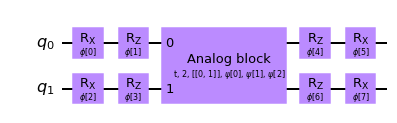

In [11]:
cirq = digital_analog_ansatz(H2_op)
cirq.draw(output="mpl")

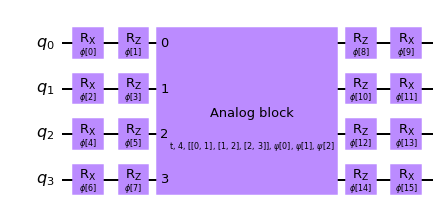

In [12]:
cirq = digital_analog_ansatz(LiH_op)
cirq.draw(output="mpl")

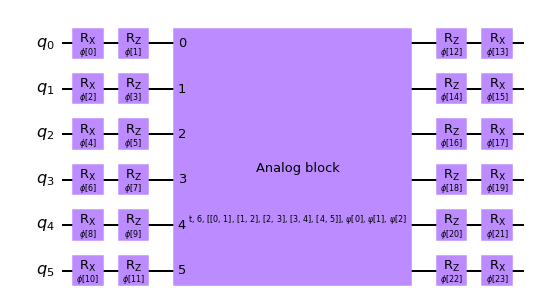

In [13]:
cirq = digital_analog_ansatz(BeH2_op)
cirq.draw(output="mpl")

The optimizer guides the evolution of the ansatz parameters, so it's very important to follow the convergence of energy since it would define the number of measurements that must be carried out in the QPU.

In [14]:
def find_E0(Operator, initial_pt, OPTIMIZER = SPSA(maxiter=iterations),entanglement="entire"):
    cirq = digital_analog_ansatz(Operator, entanglement)
    #OPTIMIZER = SLSQP(maxiter=1000) # in the absence of noise we use SLSQP
    #hist-data
    counts = []
    values = []
    def store_intermediate_result(eval_count, parameters, mean, std):
        counts.append(eval_count)
        values.append(mean)
    vqe = VQE(cirq, optimizer=OPTIMIZER, initial_point=initial_pt, callback=store_intermediate_result, quantum_instance=qi, include_custom=True)
    result = vqe.compute_minimum_eigenvalue(operator=Operator)
    hist = (values, counts)
    return result, hist

In [15]:
result, hist = find_E0(H2_op, np.random.uniform(low=0.5, high=2.0, size=(12,)),SLSQP(maxiter=1000))

In [16]:
print(result)

{   'aux_operator_eigenvalues': None,
    'cost_function_evals': 219,
    'eigenstate': {'01': 0.9938777433618282, '10': 0.11048543456039805},
    'eigenvalue': (-1.8572747652182098+0j),
    'optimal_parameters': {   Parameter(t): 3.265514181819685,
                              ParameterVectorElement($\phi$[0]): 1.3909199970098183,
                              ParameterVectorElement($\phi$[1]): 1.820353969551891,
                              ParameterVectorElement($\phi$[2]): 0.5313309751182982,
                              ParameterVectorElement($\psi$[2]): 2.0909249135825765,
                              ParameterVectorElement($\psi$[0]): 2.1255315486896373,
                              ParameterVectorElement($\phi$[7]): 1.97455272034872,
                              ParameterVectorElement($\phi$[6]): 1.4262969056157222,
                              ParameterVectorElement($\psi$[1]): 2.459009398737019,
                              ParameterVectorElement($\phi$[5]): 0.7365330

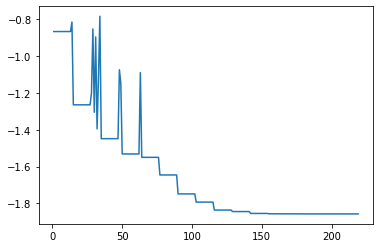

In [17]:
# Setting the values and counts for the histogram
values, counts = hist
# Plotting the graphic
plt.plot(counts, values)

In [18]:
result, hist = find_E0(LiH_op, np.random.uniform(low=0.5, high=2.0, size=(20,)),SLSQP(maxiter=1000))

In [19]:
vqe_result = LiH_problem.interpret(result).total_energies[0].real
print("Total_energy: ", vqe_result)
print("Ref: Total_energy: ", total_energy_solver(LiH_problem, LiH_converter))

Total_energy:  -7.814037800195116
Ref: Total_energy:  -7.863471722862332


In [20]:
print(result)

{   'aux_operator_eigenvalues': None,
    'cost_function_evals': 665,
    'eigenstate': {   '0000': 0.036643873123620545,
                      '0011': 0.05298695299316616,
                      '0101': 0.9921567416492215,
                      '0110': 0.04133986423538423,
                      '1001': 0.06346905003621844,
                      '1100': 0.061515686515717274,
                      '1111': 0.04419417382415922},
    'eigenvalue': (-8.84156636508832+0j),
    'optimal_parameters': {   Parameter(t): 1.6591844736434154,
                              ParameterVectorElement($\psi$[1]): 1.870394039819345,
                              ParameterVectorElement($\psi$[2]): 3.590053025128496,
                              ParameterVectorElement($\psi$[0]): -3.6977276189127384,
                              ParameterVectorElement($\phi$[15]): 0.012763816624477415,
                              ParameterVectorElement($\phi$[1]): 1.6326494973880776,
                              Paramete

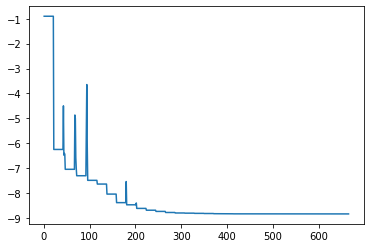

In [21]:
values, counts = hist
plt.plot(counts, values)

In [22]:
result, hist = find_E0(BeH2_op, np.random.uniform(low=0.5, high=2.0, size=(28,)),SLSQP(maxiter=1000))

In [23]:
vqe_result = BeH2_problem.interpret(result).total_energies[0].real
print("Total_energy: ", vqe_result)
print("Ref: Total_energy: ", total_energy_solver(BeH2_problem, BeH2_converter))

Total_energy:  -15.561281207719034
Ref: Total_energy:  -15.564454586481553


In [24]:
print(result)

{   'aux_operator_eigenvalues': None,
    'cost_function_evals': 1704,
    'eigenstate': {'010101': 1.0},
    'eigenvalue': (-19.021286048349804+0j),
    'optimal_parameters': {   Parameter(t): 1.7229548874272416,
                              ParameterVectorElement($\phi$[19]): 0.03282305321653148,
                              ParameterVectorElement($\phi$[18]): 3.011875294396107,
                              ParameterVectorElement($\phi$[13]): 3.156005695402018,
                              ParameterVectorElement($\phi$[10]): 0.00298746787274407,
                              ParameterVectorElement($\phi$[11]): 2.2717899101688066,
                              ParameterVectorElement($\phi$[12]): 0.11829200172462283,
                              ParameterVectorElement($\phi$[14]): 0.7892017787215768,
                              ParameterVectorElement($\phi$[16]): 0.30946084751586433,
                              ParameterVectorElement($\phi$[15]): 0.017560365773597292,
        

The energy converges nicely

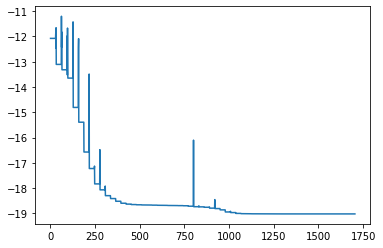

In [25]:
values, counts = hist
plt.plot(counts, values)

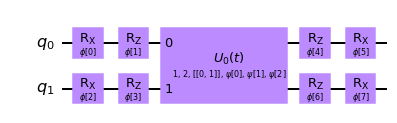

In [26]:
cirq = digital_analog_ansatz(H2_op,"staggered")
cirq.draw(output="mpl")

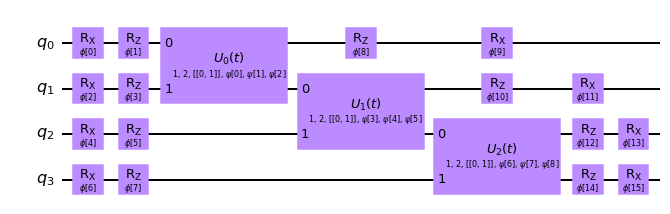

In [27]:
cirq = digital_analog_ansatz(LiH_op,"staggered")
cirq.draw(output="mpl")

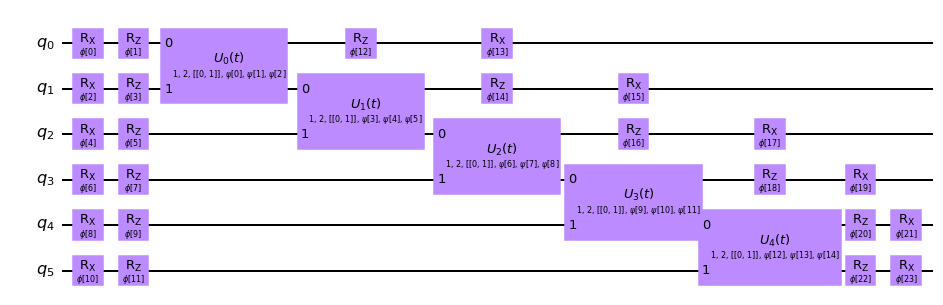

In [28]:
cirq = digital_analog_ansatz(BeH2_op,"staggered")
cirq.draw(output="mpl")

In [29]:
result, hist = find_E0(LiH_op, np.random.uniform(low=0.5, high=2.0, size=(25,)),SLSQP(maxiter=1000),"staggered")

We captured the energy values above during the convergence so we can see what went on in the graph below.

In [30]:
vqe_result = LiH_problem.interpret(result).total_energies[0].real
print("Total_energy: ", vqe_result)
print("Ref: Total_energy: ", total_energy_solver(LiH_problem, LiH_converter))

Total_energy:  -7.863155699089711
Ref: Total_energy:  -7.863471722862357


In [31]:
print(result)

{   'aux_operator_eigenvalues': None,
    'cost_function_evals': 844,
    'eigenstate': {'0101': 1.0},
    'eigenvalue': (-8.890684263982916+0j),
    'optimal_parameters': {   ParameterVectorElement($\phi$[8]): 1.2822995946312854,
                              ParameterVectorElement($\phi$[14]): 1.5985518739168363,
                              ParameterVectorElement($\phi$[15]): 0.7918067445148246,
                              ParameterVectorElement($\psi$[1]): 1.1831494178377833,
                              ParameterVectorElement($\phi$[13]): 1.1913188251584508,
                              ParameterVectorElement($\psi$[0]): 1.959658977741982,
                              ParameterVectorElement($\psi$[2]): 0.3886750020135539,
                              ParameterVectorElement($\psi$[3]): 0.2060470167995404,
                              ParameterVectorElement($\psi$[4]): -0.004019878641179327,
                              ParameterVectorElement($\psi$[5]): 1.369172396434679,


In [32]:
result, hist = find_E0(BeH2_op, np.random.uniform(low=0.5, high=2.0, size=(39,)),SLSQP(maxiter=1000),entanglement = "staggered")

## The convergence is better for the staggered case.

In [33]:
vqe_result = BeH2_problem.interpret(result).total_energies[0].real
print("Total_energy: ", vqe_result)
print("Ref: Total_energy: ", total_energy_solver(BeH2_problem, BeH2_converter))

Total_energy:  -15.564375409454719
Ref: Total_energy:  -15.564454586481478
